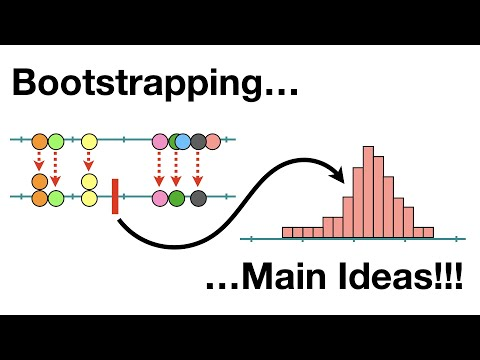

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

# Answer 1

The standard deviation (SD) of the original data measures the variability or spread of individual data points in the sample.
It tells us how much the data points deviate from the sample mean, reflecting the inherent variability in the data set.

The standard error of the mean (SEM), on the other hand, represents the variability or
precision of the sample mean as an estimate of the population mean.
It is essentially the standard deviation of the distribution of sample means (like those generated by bootstrapping),
and it decreases as sample size increases, showing how accurately the sample mean estimates the true population mean.

In summary:

1. SD: Variability of individual data points.
    
2. SEM: Variability (or precision) of the sample mean as an estimate of the population mean.

# Answer 2

To create a 95% confidence interval using the standard error of the mean (SEM), follow these steps:

1. Calculate the SEM: This measures the variability of the sample mean.

2. Find the critical value: For a 95% confidence level, the critical value from a standard normal distribution (z-distribution) is approximately 1.96.

3. Construct the interval: Multiply the SEM by 1.96 to find the margin of error, then add and subtract this margin from the sample mean. The formula is:

CI=Sample Mean±(1.96×SEM)

This gives you a range (confidence interval) that likely contains the true population mean, with 95% of the bootstrapped sample means falling within this interval.

# Answer 3

To create a 95% bootstrapped confidence interval using bootstrapped means directly, without using their standard deviation or SEM, follow these steps:

1. Generate bootstrapped means: Perform repeated resampling with replacement from the original data to calculate many bootstrapped sample means.


2. Use percentiles to find the interval: Once you have the distribution of bootstrapped means, use the np.quantile() function to find the 2.5th and 97.5th percentiles. This method identifies the middle 95% of the bootstrapped means.

In [ ]:
lower_bound = np.quantile(bootstrapped_means, 0.025)
upper_bound = np.quantile(bootstrapped_means, 0.975)


This gives you the 95% bootstrapped confidence interval, which directly captures the range within which 95% of the bootstrapped sample means lie. This approach is non-parametric and doesn't assume a specific distribution.

In [3]:
# Answer 4

import numpy as np

# Sample data
data = [5, 7, 8, 5, 6, 9, 7, 6, 7, 5]  # Example sample data

# Number of bootstrap resamples
n_bootstraps = 10000

# Function to calculate bootstrap confidence interval
def bootstrap_confidence_interval(data, stat_func, n_bootstraps=10000, ci=95):
    """
    Generates a bootstrap confidence interval for a given statistic.

    Parameters:
    data (array-like): Original sample data.
    stat_func (function): Function to compute the desired statistic (e.g., np.mean, np.median).
    n_bootstraps (int): Number of bootstrap resamples.
    ci (float): Confidence level (95% by default).

    Returns:
    tuple: Lower and upper bounds of the confidence interval.
    """
    # Create bootstrap samples and compute the statistic for each resample
    bootstrapped_stats = []
    for _ in range(n_bootstraps):
        resample = np.random.choice(data, size=len(data), replace=True)  # Resample with replacement
        bootstrapped_stats.append(stat_func(resample))  # Compute the statistic for the resample

    # Compute the lower and upper bounds of the confidence interval
    lower_bound = np.quantile(bootstrapped_stats, (100 - ci) / 200)  # Lower bound (2.5th percentile for 95% CI)
    upper_bound = np.quantile(bootstrapped_stats, 1 - (100 - ci) / 200)  # Upper bound (97.5th percentile for 95% CI)

    return lower_bound, upper_bound

# Compute the 95% bootstrap confidence interval for the population mean
ci_mean = bootstrap_confidence_interval(data, np.mean)
print(f"95% Bootstrap Confidence Interval for the Mean: {ci_mean}")

# To compute the 95% bootstrap confidence interval for the population median:
# Simply replace np.mean with np.median in the function call
ci_median = bootstrap_confidence_interval(data, np.median)
print(f"95% Bootstrap Confidence Interval for the Median: {ci_median}")



95% Bootstrap Confidence Interval for the Mean: (5.8, 7.3)
95% Bootstrap Confidence Interval for the Median: (5.0, 7.5)


Code Explanation:

1. Sample Data: The sample is stored in data.

2. Bootstrap Resampling: We generate n_bootstraps resamples from the original data, each with the same size as the original sample, using replacement.

3. Statistic Calculation: The desired statistic (mean or median) is calculated for each bootstrap sample.

4. Confidence Interval: The 95% confidence interval is obtained by computing the 2.5th and 97.5th percentiles of the bootstrapped statistics using np.quantile().


# Answer 5

Distinguishing between the population parameter and the sample statistic is crucial when it comes to confidence intervals because:

1. Population Parameter: This is a fixed value that describes a characteristic of the entire population (e.g., the true population mean or median). It is usually unknown and represents the target we aim to estimate.

2. Sample Statistic: This is a calculated value derived from a sample taken from the population (e.g., the sample mean or median). It serves as an estimate of the population parameter.

When constructing confidence intervals, we use the sample statistic to infer about the population parameter. The confidence interval provides a range of plausible values for the population parameter based on the sample data, reflecting the uncertainty inherent in sampling.

This distinction is essential because:

1. The sample statistic is subject to sampling variability, meaning different samples can yield different estimates.

2. Confidence intervals help quantify that uncertainty, indicating how well the sample statistic estimates the population parameter and allowing for informed decision-making based on the sample data.







# Answer 6

What is the process of bootstrapping?

So, imagine you have a sample of data, like the test scores of your friends. Bootstrapping is like creating a bunch of new “mini-samples” from that original set of scores. Here’s how it works:

1. Start with Your Sample: You have your original sample, let’s say 10 scores.

2. Resampling with Replacement: You randomly pick scores from your original sample to create a new sample of the same size. The trick is that you can pick the same score more than once, which is called "sampling with replacement." So, one of your mini-samples might have some scores repeated, and others missing.

3. Repeat: You do this many times, like 1,000 or even 10,000 times, creating lots of these mini-samples.

4. Calculate Statistics: For each mini-sample, you calculate whatever statistic you’re interested in—like the average score, the median, or something else.

In the end, we will have a distribution of those statistics from all the mini-samples. This gives us a good idea of how your sample statistic (like the average score) behaves.

What is the main purpose of bootstrapping?

The main purpose of bootstrapping is to help us understand how reliable our estimates are when we only have a sample of data. It gives us a way to estimate things like the standard error or create confidence intervals without making strict assumptions about the data’s distribution.

Basically, it helps us see how our sample statistic might vary if we were to take different samples from the same population. This way, we can get a better sense of the uncertainty around our estimates.

If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

1. Collect Your Sample: You have your 10 test scores.

2. Bootstrap Your Sample: Use bootstrapping to create lots of mini-samples from those 10 scores. As we talked about, you’ll create maybe 1,000 or 10,000 of these mini-samples.

3. Calculate the Average for Each Mini-Sample: For each of those mini-samples, calculate the average score. Now you have a distribution of averages.

4. Check Your Hypothesis: Look at the distribution of bootstrapped averages. If your guessed average of 75 falls within, say, the 95% confidence interval you get from those bootstrapped averages, then your guess seems plausible. But if 75 is way outside that range, it suggests that your guess might not be correct.


# Answer 7

Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean itself is not zero?

1. Understanding the Null Hypothesis: In hypothesis testing, the null hypothesis (Ho) states that there is no effect or no difference (e.g., the average effect of the drug is zero). When we say that we "fail to reject the null hypothesis," we mean that the evidence we have (from our sample data) is not strong enough to say that there is a significant effect.

2. Confidence Interval Interpretation: A confidence interval gives us a range of values that likely contains the true population mean. If this interval includes zero, it suggests that it is plausible that the true average effect could be zero, even if our observed sample mean is not. This means we lack sufficient evidence to confidently claim the drug has a real effect.

3. Sample Variability: The observed sample mean can vary due to random sampling. When we have a small sample size, this variability can lead to a situation where our sample mean is significantly different from zero, but the uncertainty (as captured by the confidence interval) indicates that the true population mean could still be zero. This highlights the importance of understanding variability: a sample mean being non-zero does not guarantee that the population mean is also non-zero.

What would lead to "rejecting the null hypothesis"?

1. Confidence Interval Excluding Zero: If the confidence interval does not overlap with zero, it means all plausible values for the true population mean are either positive or negative. In this case, we can reject the null hypothesis because we have strong evidence that the drug does have an effect (either positive or negative) on average.

2. Statistical Significance: In hypothesis testing, we also look at p-values. If the p-value is below a certain threshold (like 0.05), it indicates that the observed effect is unlikely to occur by chance under the null hypothesis. This would also lead us to reject the null hypothesis, supporting the idea that the drug has a significant effect.

Key Distinctions to Remember

1. Observed Sample Values: These are the individual data points collected from the sample.

2. Observed Sample Mean (x-): This is the average of those sample values. It can differ from zero but still not provide strong evidence of a true effect if the confidence interval overlaps zero.

3. True Population Parameter (μ): This is the actual average effect we’re trying to estimate. The goal is to use our sample to infer what this parameter might be.

The Essence of Hypothesis Testing

In hypothesis testing, the null hypothesis serves as a baseline or a "straw man" that we assume is true until we gather enough evidence to doubt it. When we conduct our tests, we're looking for evidence to reject this null hypothesis in favor of the alternative hypothesis, which suggests there is a real effect. The process hinges on understanding and leveraging variability in our sample data, and confidence intervals play a crucial role in that decision-making process.

In summary, the overlapping of the confidence interval with zero signifies that the evidence is not strong enough to claim a significant effect, while a confidence interval that does not include zero provides compelling evidence to reject the null hypothesis and conclude that the drug does have an effect on average.

# Answer 8

Vaccine Data Analysis Assignment

Problem Introduction

AliTech has developed a new vaccine to improve the health of people who take it. To determine whether the vaccine is effective, we will analyze data comparing patients' health before and after receiving the vaccine. Specifically, we’ll evaluate if there is a statistically significant improvement in patients' health scores.

Null Hypothesis of "No Effect"

In this context, the null hypothesis (Ho) assumes that the vaccine has no effect on health, meaning there is no significant difference between the InitialHealthScore (before) and FinalHealthScore (after). The alternative hypothesis (H1) posits that the vaccine improves health, and thus there is a meaningful difference between the two scores.



In [ ]:
PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
1,45,M,84,86
2,34,F,78,86
3,29,M,83,80
4,52,F,81,86
5,37,M,81,84
6,41,F,80,86
7,33,M,79,86
8,48,F,85,82
9,26,M,76,83
10,39,F,83,84


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading the CSV data into a DataFrame
data = pd.read_csv('vaccine_data.csv')

# Plotting Initial vs Final Health Scores
plt.figure(figsize=(10,6))
plt.plot(data['PatientID'], data['InitialHealthScore'], marker='o', label='Initial Health Score')
plt.plot(data['PatientID'], data['FinalHealthScore'], marker='o', label='Final Health Score', linestyle='--')
plt.xlabel('Patient ID')
plt.ylabel('Health Score')
plt.title('Comparison of Initial and Final Health Scores for Patients')
plt.legend()
plt.show()


Quantitative Analysis
Methodology

We’ll use bootstrapping to estimate the confidence interval for the difference between the InitialHealthScore and FinalHealthScore. This will help us determine whether the vaccine has a statistically significant effect on health.

Bootstrapping Approach

1. Null Hypothesis: The mean difference between the initial and final health scores is zero (no effect).

2. Bootstrap Resampling: We repeatedly sample the difference between the final and initial scores and compute the average difference for each resample.

3. Confidence Interval: We'll calculate a 95% confidence interval for the mean difference. If this interval excludes zero, we reject the null hypothesis, indicating that the vaccine likely has an effect.

In [ ]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Calculate the difference between Initial and Final Health Scores
data['HealthScoreDiff'] = data['FinalHealthScore'] - data['InitialHealthScore']

# Number of bootstrap samples
n_bootstraps = 10000

# Bootstrapping function
def bootstrap_mean_diff(data, n_bootstraps=10000):
    bootstrapped_means = []
    for _ in range(n_bootstraps):
        resample = np.random.choice(data, size=len(data), replace=True)
        bootstrapped_means.append(np.mean(resample))
    return bootstrapped_means

# Perform bootstrapping on the HealthScoreDiff
boot_means = bootstrap_mean_diff(data['HealthScoreDiff'], n_bootstraps)

# Calculate 95% confidence interval
lower_bound = np.percentile(boot_means, 2.5)
upper_bound = np.percentile(boot_means, 97.5)

print(f"95% Confidence Interval for the difference in health scores: ({lower_bound}, {upper_bound})")


Findings and Discussion

1. HealthScore Difference: The mean difference between the InitialHealthScore and FinalHealthScore is calculated for each bootstrap sample, allowing us to build a distribution of mean differences.

2. Confidence Interval: We compute a 95% confidence interval for the difference in health scores using the bootstrap method. If the interval excludes zero, it would indicate that the vaccine has a statistically significant effect on health.

Conclusion regarding the Null Hypothesis of "No Effect"

If the 95% confidence interval for the difference between initial and final health scores does not include zero, we can reject the null hypothesis and conclude that the vaccine likely has an effect. If the interval includes zero, we fail to reject the null hypothesis, meaning there is not enough evidence to claim the vaccine is effective.

Further Considerations

1. We could extend this analysis by considering patient age or gender to check if the vaccine effect varies by these factors.

2. Larger sample sizes or additional trials would improve the reliability of our conclusions.

# Answer 9

yes.